#**ASSOCIATION RULES** -

Association rules are a popular data mining technique used to uncover interesting relationships or associations between variables in large datasets. These rules are commonly used in market basket analysis to identify sets of products that frequently co-occur in transactions. The primary goal of association rule mining is to find patterns or associations that can provide insights into the behavior of customers or other entities.


The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.

#Dataset:
Use the Online retail dataset to apply the association rules.

#Data Preprocessing:
- Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  

#Association Rule Mining:
-	Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
- Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
- Set appropriate threshold for support, confidence and lift to extract meaning full rules.

#Analysis and Interpretation:
-	Analyse the generated rules to identify interesting patterns and relationships between the products.
- Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


In [117]:
#Loading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Step 1: Load and Explore the Dataset**

In [118]:
# Load the dataset
file_path = r'/content/Online retail.xlsx'
data_retail = pd.read_excel(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
# Display the first few rows of the dataset
data_retail.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Products
0  shrimp,almonds,avocado,vegetables mix,green gr...
1                             burgers,meatballs,eggs
2                                            chutney
3                                     turkey,avocado
4  mineral water,milk,energy bar,whole wheat rice...

In [120]:
# Display the last few rows of the dataset
data_retail.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Products
7496                      butter,light mayo,fresh bread
7497  burgers,frozen vegetables,eggs,french fries,ma...
7498                                            chicken
7499                                 escalope,green tea
7500    eggs,frozen smoothie,yogurt cake,low fat yogurt

In [121]:
#Shape of the dataset
data_retail.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7501, 1)

In [122]:
#Summary Stastics
data_retail.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Products
count      7501
unique     5176
top     cookies
freq        223

In [123]:
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Products  7501 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Step 2: Data Preprocessing**

In [124]:
data_retail.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Products    0
dtype: int64

In [125]:
#Typcasting
data_retail['Products'] = data_retail['Products'].astype('category')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
#datatypes
data_retail.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Products    category
dtype: object

In [127]:
# Handling missing values
data_retail.dropna(inplace=True)

# Removing duplicates
data_retail.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
# Display data information after preprocessing
data_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5176 entries, 0 to 7500
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Products  5176 non-null   category
dtypes: category(1)
memory usage: 220.0 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Extract the column name
column_name = data_retail.columns[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
# Split the items in each transaction
#Transactions: These are the sets of items purchased together in a single purchase event (i.e., a basket).
transactions = data_retail[column_name].str.split(',')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [131]:
# Convert the transactions into a list of lists
transaction_list = transactions.tolist()
print(transaction_list)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# Use TransactionEncoder to transform the transaction list into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df_reatil = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
# Display the first few rows of the dataset
print(df_retail.head())

    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False     True               True      False     True        False   
1       False    False              False      False    False        False   
2       False    False              False      False    False        False   
3       False    False              False      False     True        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False            True   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...   False           False   
3  False           False      False        False  ...    True           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Step 3: Association Rule Mining**

In [134]:
# Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_retail, min_support=0.01, use_colnames=True)
# Display the frequent itemsets
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                               itemsets
0    0.029366                              (almonds)
1    0.011206                    (antioxydant juice)
2    0.045981                              (avocado)
3    0.012558                                (bacon)
4    0.015456                       (barbecue sauce)
..        ...                                    ...
433  0.014683  (spaghetti, olive oil, mineral water)
434  0.016615   (spaghetti, pancakes, mineral water)
435  0.012365     (shrimp, mineral water, spaghetti)
436  0.010819       (spaghetti, mineral water, soup)
437  0.013524   (tomatoes, mineral water, spaghetti)

[438 rows x 2 columns]


In [100]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
# Display the association rules
print(rules)

                    antecedents                 consequents  \
0                     (almonds)             (mineral water)   
1               (mineral water)                   (almonds)   
2                   (chocolate)                   (avocado)   
3                     (avocado)                 (chocolate)   
4                (french fries)                   (avocado)   
..                          ...                         ...   
835       (tomatoes, spaghetti)             (mineral water)   
836  (spaghetti, mineral water)                  (tomatoes)   
837                  (tomatoes)  (spaghetti, mineral water)   
838             (mineral water)       (tomatoes, spaghetti)   
839                 (spaghetti)   (tomatoes, mineral water)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.029366            0.299845  0.011012    0.375000  1.250644   
1              0.299845            0.029366  0.011012    0.036727  1.250644   
2     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Step 4: Analysis and Interpretation**

In [102]:
# Sort rules by lift and display top 10 rules
sorted_rules = rules.sort_values(by='lift', ascending=False).head(10)
sorted_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


antecedents                     consequents  \
424             (whole wheat pasta)                     (olive oil)   
425                     (olive oil)             (whole wheat pasta)   
792           (milk, mineral water)                          (soup)   
797                          (soup)           (milk, mineral water)   
299                   (ground beef)                 (herb & pepper)   
298                 (herb & pepper)                   (ground beef)   
736         (shrimp, mineral water)             (frozen vegetables)   
737             (frozen vegetables)         (shrimp, mineral water)   
716  (frozen vegetables, spaghetti)                   (ground beef)   
721                   (ground beef)  (frozen vegetables, spaghetti)   

     antecedent support  consequent support   support  confidence      lift  \
424            0.040572            0.087713  0.011012    0.271429  3.094525   
425            0.087713            0.040572  0.011012    0.125551  3.094525   
792            0.067813            0.070904  0.012365    0.182336  2.571586   
797            0.070904            0.067813  0.012365    0.174387  2.571586   
299            0.135819            0.066461  0.022798    0.167852  2.525588   
298            0.066461            0.135819  0.022798    0.343023  2.525588   
736            0.033617            0.129830  0.010433    0.310345  2.390394   
737            0.129830            0.033617  0.010433    0.080357  2.390394   
716            0.039026            0.135819  0.012558    0.321782  2.369196   
721            0.135819            0.039026  0.012558    0.092461  2.369196   

     leverage  conviction  zhangs_metric  
424  0.007454    1.252159       0.705471  
425  0.007454    1.097180       0.741925  
792  0.007557    1.136281       0.655593  
797  0.007557    1.129085       0.657774  
299  0.013771    1.121843       0.698989  
298  0.013771    1.315390       0.647056  
736  0.006068    1.261747       0.601893  
737  0.006068    1.050825       0.668443  
716  0.007257    1.274194       0.601386  
721  0.007257    1.058879       0.668744

- The rules involving ground beef and herb & pepper have the highest supports (2.3%), suggesting these combinations are relatively more common in the dataset.
- Rules with higher confidence values indicate a stronger relationship between the antecedent and consequent.
- Leverage values are low but positive, indicating small but positive associations.
- Conviction values are above 1 for all rules, indicating that the rules are somewhat reliable.
- Zhang's Metric values suggest moderate to strong associations across the rules.
- **Strong Associations:** Items like "whole wheat pasta and olive oil" and "ground beef and herb & pepper" are strongly associated, suggesting they could be promoted together.
- **Common Pairings:** Ground beef appears frequently in the rules, indicating it is a central item in many transactions.


**Step 5: Insights into Customer Purchasing Behavior**

In [133]:
''' Support: The proportion of transactions in the dataset that contain the itemset. It's a measure of how frequently an itemset appears in the dataset.
Confidence: The likelihood that an item B is purchased when item A is purchased. It's the ratio of the number of transactions that contain both A and B to the number of
transactions that contain A.
Lift: The ratio of the observed support to that expected if A and B were independent. Lift greater than 1 indicates a positive association between the items.'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" Support: The proportion of transactions in the dataset that contain the itemset. It's a measure of how frequently an itemset appears in the dataset.\nConfidence: The likelihood that an item B is purchased when item A is purchased. It's the ratio of the number of transactions that contain both A and B to the number of \ntransactions that contain A.\nLift: The ratio of the observed support to that expected if A and B were independent. Lift greater than 1 indicates a positive association between the items."

In [103]:
# Analyze and interpret the results
for index, row in sorted_rules.iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"Rule: {antecedents} -> {consequents}")
    print(f"Support: {row['support']:.2f}")
    print(f"Confidence: {row['confidence']:.2f}")
    print(f"Lift: {row['lift']:.2f}")
    print()


Rule: whole wheat pasta -> olive oil
Support: 0.01
Confidence: 0.27
Lift: 3.09

Rule: olive oil -> whole wheat pasta
Support: 0.01
Confidence: 0.13
Lift: 3.09

Rule: milk, mineral water -> soup
Support: 0.01
Confidence: 0.18
Lift: 2.57

Rule: soup -> milk, mineral water
Support: 0.01
Confidence: 0.17
Lift: 2.57

Rule: ground beef -> herb & pepper
Support: 0.02
Confidence: 0.17
Lift: 2.53

Rule: herb & pepper -> ground beef
Support: 0.02
Confidence: 0.34
Lift: 2.53

Rule: shrimp, mineral water -> frozen vegetables
Support: 0.01
Confidence: 0.31
Lift: 2.39

Rule: frozen vegetables -> shrimp, mineral water
Support: 0.01
Confidence: 0.08
Lift: 2.39

Rule: frozen vegetables, spaghetti -> ground beef
Support: 0.01
Confidence: 0.32
Lift: 2.37

Rule: ground beef -> frozen vegetables, spaghetti
Support: 0.01
Confidence: 0.09
Lift: 2.37



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. **Rule: whole wheat pasta -> olive oil**
- Support: 0.01 (1% of all transactions include both whole wheat pasta and olive oil)
- Confidence: 0.27 (When whole wheat pasta is purchased, there is a 27% chance that olive oil is also purchased)
- Lift: 3.09 (Purchasing whole wheat pasta increases the likelihood of purchasing olive oil by 3.09 times compared to the average)

2. **Rule: olive oil -> whole wheat pasta**
- Support: 0.01 (1% of all transactions include both olive oil and whole wheat pasta)
- Confidence: 0.13 (When olive oil is purchased, there is a 13% chance that whole wheat pasta is also purchased)
- Lift: 3.09 (Purchasing olive oil increases the likelihood of purchasing whole wheat pasta by 3.09 times compared to the average)

3. **Rule: milk, mineral water -> soup**
- Support: 0.01 (1% of all transactions include milk, mineral water, and soup)
- Confidence: 0.18 (When milk and mineral water are purchased together, there is an 18% chance that soup is also purchased)
- Lift: 2.57 (Purchasing milk and mineral water together increases the likelihood of purchasing soup by 2.57 times compared to the average)

4. **Rule: soup -> milk, mineral water**
- Support: 0.01 (1% of all transactions include soup, milk, and mineral water)
- Confidence: 0.17 (When soup is purchased, there is a 17% chance that milk and mineral water are also purchased)
- Lift: 2.57 (Purchasing soup increases the likelihood of purchasing milk and mineral water by 2.57 times compared to the average)

5. **Rule: ground beef -> herb & pepper**
- Support: 0.02 (2% of all transactions include ground beef and herb & pepper)
- Confidence: 0.17 (When ground beef is purchased, there is a 17% chance that herb & pepper is also purchased)
- Lift: 2.53 (Purchasing ground beef increases the likelihood of purchasing herb & pepper by 2.53 times compared to the average)

6. **Rule: herb & pepper -> ground beef**
- Support: 0.02 (2% of all transactions include herb & pepper and ground beef)
- Confidence: 0.34 (When herb & pepper is purchased, there is a 34% chance that ground beef is also purchased)
- Lift: 2.53 (Purchasing herb & pepper increases the likelihood of purchasing ground beef by 2.53 times compared to the average)

7. **Rule: shrimp, mineral water -> frozen vegetables**
- Support: 0.01 (1% of all transactions include shrimp, mineral water, and frozen vegetables)
- Confidence: 0.31 (When shrimp and mineral water are purchased together, there is a 31% chance that frozen vegetables are also purchased)
- Lift: 2.39 (Purchasing shrimp and mineral water together increases the likelihood of purchasing frozen vegetables by 2.39 times compared to the average)

8. **Rule: frozen vegetables -> shrimp, mineral water**
- Support: 0.01 (1% of all transactions include frozen vegetables, shrimp, and mineral water)
- Confidence: 0.08 (When frozen vegetables are purchased, there is an 8% chance that shrimp and mineral water are also purchased)
- Lift: 2.39 (Purchasing frozen vegetables increases the likelihood of purchasing shrimp and mineral water by 2.39 times compared to the average)

9. **Rule: frozen vegetables, spaghetti -> ground beef**
- Support: 0.01 (1% of all transactions include frozen vegetables, spaghetti, and ground beef)
- Confidence: 0.32 (When frozen vegetables and spaghetti are purchased together, there is a 32% chance that ground beef is also purchased)
- Lift: 2.37 (Purchasing frozen vegetables and spaghetti together increases the likelihood of purchasing ground beef by 2.37 times compared to the average)

10. **Rule: ground beef -> frozen vegetables, spaghetti**
- Support: 0.01 (1% of all transactions include ground beef, frozen vegetables, and spaghetti)
- Confidence: 0.09 (When ground beef is purchased, there is a 9% chance that frozen vegetables and spaghetti are also purchased)
- Lift: 2.37 (Purchasing ground beef increases the likelihood of purchasing frozen vegetables and spaghetti by 2.37 times compared to the average)

###Conclusion

##**Analysis of Generated Rules**

1. **Whole Wheat Pasta and Olive Oil**
- Rule: Whole wheat pasta -> Olive oil (and vice versa)
- Lift: 3.095
- Support: 1.1%
- Confidence: 27.1% and 12.6%
- **Pattern:** Customers who purchase whole wheat pasta are significantly more likely to purchase olive oil, and vice versa. This suggests that these products are commonly used together, possibly for cooking healthy meals.

2. **Milk, Mineral Water, and Soup**
- Rule: Milk, mineral water -> Soup (and vice versa)
- Lift: 2.571
- Support: 1.2%
- Confidence: 18.2% and 17.4%
- **Pattern:** There is a notable association between customers buying milk and mineral water together with soup. This combination could indicate that these items are part of a common meal planning or grocery shopping pattern.

3. **Ground Beef and Herb & Pepper**
- Rule: Ground beef -> Herb & pepper (and vice versa)
- Lift: 2.526
- Support: 2.3%
- Confidence: 16.8% and 34.3%
- **Pattern:** The strong association between ground beef and herb & pepper suggests that customers often buy these items together, likely for specific recipes or meal preparation.

4. **Shrimp, Mineral Water, and Frozen Vegetables**
- Rule: Shrimp, mineral water -> Frozen vegetables (and vice versa)
- Lift: 2.390
- Support: 1.0%
- Confidence: 31.0% and 8.0%
- **Pattern:** Customers purchasing shrimp and mineral water are quite likely to also buy frozen vegetables. This combination might indicate a preference for convenient, healthy meal options.

5. **Frozen Vegetables, Spaghetti, and Ground Beef**
- Rule: Frozen vegetables, spaghetti -> Ground beef (and vice versa)
- Lift: 2.369
- Support: 1.3%
- Confidence: 32.2% and 9.2%
- **Pattern:** There is a strong likelihood that customers who buy frozen vegetables and spaghetti also purchase ground beef. This suggests a common meal planning pattern, such as preparing pasta dishes with meat and vegetables.

###**Interpretation and Insights into Customer Purchasing Behavior**

1. **Healthy Eating Patterns:**
The strong association between whole wheat pasta and olive oil suggests that customers purchasing these items might be health-conscious and looking for healthier cooking options. Retailers can use this information to create targeted promotions for health foods.

2. **Convenience and Meal Planning:**
The rules involving milk, mineral water, and soup, as well as shrimp, mineral water, and frozen vegetables, indicate a preference for convenient meal components. These combinations suggest that customers might be planning for quick and easy meal preparation.

3. **Recipe-Based Purchases:**
The associations between ground beef and herb & pepper, as well as frozen vegetables, spaghetti, and ground beef, imply that customers are likely buying ingredients for specific recipes. Retailers can use this to their advantage by placing these items near each other or creating meal kits that include these combinations.

4. **Product Placement and Promotions:**
By understanding these associations, retailers can strategically place products that are often purchased together in close proximity within the store. Additionally, they can design promotions and discounts that encourage the purchase of these related items, thereby increasing overall sales.

5. **Inventory Management:**
Knowing which products are frequently bought together can help retailers better manage inventory, ensuring that these items are stocked together and in appropriate quantities to meet customer demand.

#**Interview Questions:**


##**1.	What is lift and why is it important in Association rules?**

**Lift**  is a metric used in association rule mining to evaluate the strength and importance of a rule.
- It measures how much more likely the consequent (Y) is to occur when the antecedent (X) is present compared to when X is not present.
- Essentially, lift provides a way to understand the significance of an association rule beyond simple co-occurrence.
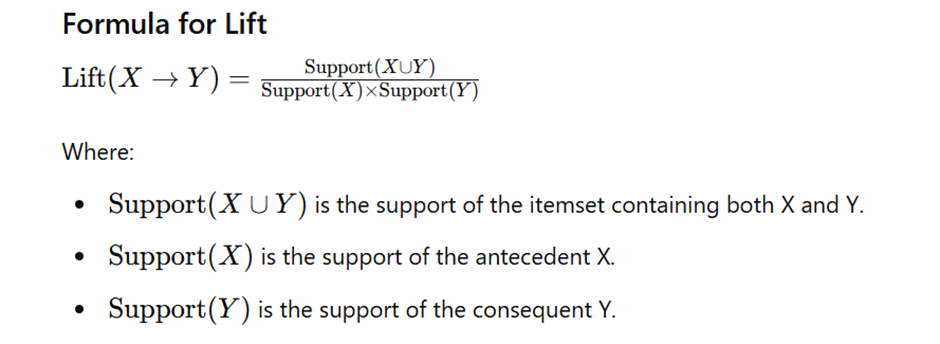


**Interpretation of Lift**
- **Lift > 1:** Indicates a positive correlation between X and Y. This means that the presence of X increases the likelihood of Y occurring. The higher the lift value, the stronger the association.
- **Lift = 1:** Indicates that X and Y are independent. The occurrence of X does not affect the likelihood of Y occurring.
- **Lift < 1:** Indicates a negative correlation between X and Y. This means that the presence of X decreases the likelihood of Y occurring.


###**Importance of Lift in Association Rules**

**Identifying Strong Associations:**
- Lift helps identify rules that represent significant relationships between items. A high lift value suggests a strong association, making it a valuable metric for understanding the strength of a rule.

**Filtering Redundant Rules:**
- Unlike support and confidence, which can sometimes highlight rules that are not truly significant, lift helps filter out those rules by considering the overall frequency of the items involved. Rules with a lift value close to 1 are likely to be less interesting since they indicate that the items occur together just as often as would be expected by chance.

**Business Insights:**
- In a retail context, lift can help businesses understand which products are commonly purchased together in a way that is more meaningful than just looking at raw counts. This can inform decisions about product placement, promotions, and inventory management.

**Decision-Making:**
- By focusing on rules with a high lift, decision-makers can prioritize actions that are more likely to have a positive impact. For example, in cross-selling strategies, knowing which items have a high lift when sold together can guide more effective marketing campaigns.



#**Example**
Consider a dataset of supermarket transactions, and the rule {bread} -> {butter}: If the support of {bread, butter} is 0.05, the support of {bread} is 0.20, and the support of {butter} is 0.10, the lift of the rule {bread} -> {butter} would be:

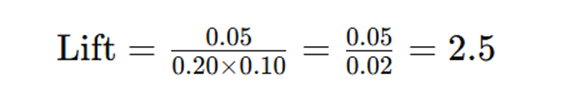



This lift value of 2.5 means that customers who buy bread are 2.5 times more likely to buy butter than customers who do not buy bread. This strong association can be useful for placing these items near each other in the store or offering joint promotions.

#**2.	What is support and Confidence. How do you calculate them?**

Support and confidence are two fundamental metrics used in association rule mining to measure the usefulness and reliability of discovered rules.

###**Support**

Support measures how frequently an itemset appears in the dataset. It is the proportion of transactions in the dataset that contain the itemset. Support helps in identifying the most frequent itemsets in the dataset.

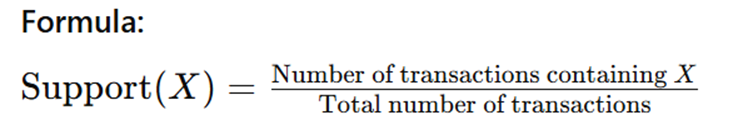

**Example:**

Consider a dataset with 100 transactions and an itemset {milk, bread} that appears in 20 of these transactions. The support for the itemset {milk, bread} is:

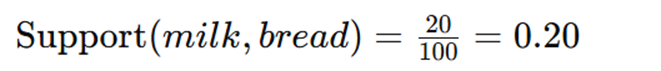

This means 20% of the transactions contain both milk and bread.


##**Confidence**

Confidence measures the likelihood that an item Y is purchased when item X is purchased. It is the ratio of the number of transactions that contain both X and Y to the number of transactions that contain X. Confidence helps in understanding the reliability of the rule.

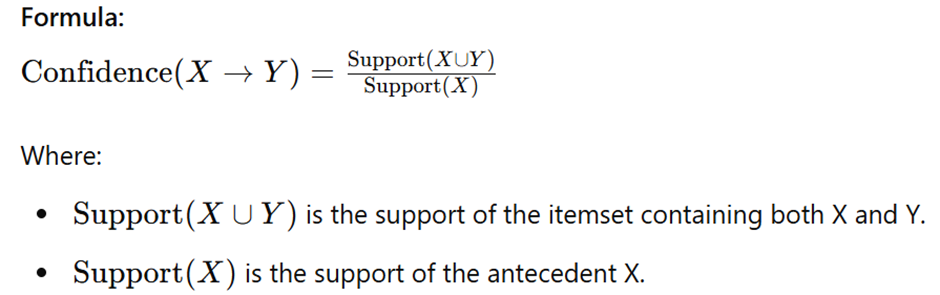

###**Example:**
Using the previous example, suppose the support for {milk, bread} is 0.20 and the support for {milk} alone is 0.30. The confidence for the rule {milk} -> {bread} is:

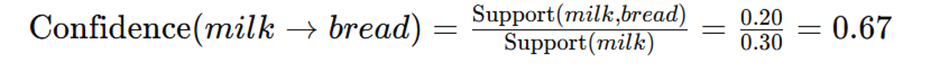

This means that 67% of the transactions that contain milk also contain bread.



##**Steps to Calculate Support and Confidence**

**Identify the Itemsets:**
Determine the itemsets or pairs of items for which you want to calculate support and confidence.

**Count Transactions:**
- Count the total number of transactions in the dataset.
- Count the number of transactions that contain each itemset (for support).
- Count the number of transactions that contain the antecedent item (for confidence).

**Calculate Support:**
Use the formula for support to determine how frequently the itemset appears in the dataset.

**Calculate Confidence:**
Use the formula for confidence to determine the reliability of the rule, given the antecedent.

- **Support:** Measures the frequency of an itemset in the dataset. Higher support indicates more frequent occurrence.
- **Confidence:** Measures the reliability of an association rule. Higher confidence indicates a stronger likelihood of the consequent given the antecedent.


##**3.	What are some limitations or challenges of Association rules mining?**

Association rule mining is a powerful technique for discovering interesting relationships between items in large datasets. However, it comes with several limitations and challenges:

**1. Scalability and Performance**
- **Large Datasets:** Association rule mining can be computationally intensive, especially with large datasets. The Apriori algorithm, for example, generates a large number of candidate itemsets, leading to high memory usage and slow processing times.
- **High Dimensionality:** When the number of unique items is large, the number of possible itemsets increases exponentially, making it challenging to compute and store all possible associations.

**2. Choosing Appropriate Parameters**
- **Support and Confidence Thresholds:** Setting appropriate minimum support and confidence thresholds can be difficult. Too high thresholds may result in too few rules, while too low thresholds may produce an overwhelming number of trivial or uninteresting rules.
- **Lift and Other Metrics:** Although lift helps identify strong associations, interpreting and balancing multiple metrics (like leverage, conviction) can be complex.

**3. Handling Rare Items**
- **Rare Item Problem:** Items that appear infrequently in the dataset might be ignored if the support threshold is too high, potentially missing interesting but less frequent associations.

**4. Redundant and Trivial Rules**
- **Rule Redundancy:** Many rules can be redundant, offering no new information. Filtering out these redundant rules can be challenging and time-consuming.
- **Trivial Rules:** Some discovered rules may be obvious or trivial, providing little valuable insight.

**5. Interpretability**
- **Complexity of Rules:** As the number of items increases, the rules can become more complex and harder to interpret. Long or intricate rules might be difficult for users to understand and act upon.

**6. Data Quality Issues**
- **Noisy Data:** Real-world datasets often contain noise, errors, or inconsistencies that can affect the quality of the generated rules.
- **Missing Values:** Handling missing or incomplete data can be challenging and may require sophisticated preprocessing techniques.

**7. Contextual and Domain-Specific Challenges**
- **Lack of Context:** Association rules do not provide context or causality. A rule indicating that two items are frequently bought together does not explain why this happens.
- **Domain Expertise:** Interpreting and validating the usefulness of rules often requires domain knowledge. Without it, identifying actionable insights can be difficult.

**8. Data Sparsity**
- **Sparse Data:** In datasets where transactions have many unique items but few common ones, finding meaningful associations can be difficult due to the sparsity of co-occurring items.

**9. Privacy Concerns**
- **Sensitive Information:** Mining associations from datasets containing sensitive information (e.g., health records, financial transactions) can raise privacy concerns. Ensuring data privacy while mining can be challenging.

**10. Actionability of Rules**
- **Practical Application:** Not all discovered rules are actionable. Translating discovered associations into practical strategies or decisions can be difficult without further analysis and validation.